## Part 1
Some years ago, researchers collected a dataset called ["Copenhagen Network study"](https://figshare.com/articles/dataset/The_Copenhagen_Networks_Study_interaction_data/7267433). They collected several informations among 700 universitary students. In this exam, we are intrested in:

1. the network of phone calls [calls.csv](DTU/calls.csv)
2. the network of text messages [sms.csv](DTU/sms.csv)
3. Information about Facebook friendships [fb_friends.csv](DTU/fb_friends.csv)
4. The gender of the students [genders.csv](DTU/genders.csv)

the data are like follows:
**calls.csv**
```
timestamp,caller,callee,duration
184,300,301,121
3920,512,299,670
```
**sms.csv**
```
timestamp,sender,recipient
18,370,512
37,512,370
```
**fb_friends.csv**
```
# user_a,user_b
0,512
0,263
0,525
```
**gender.csv**

```
# user,female
0,0
2,0
3,0
4,0
5,0
```

you have to write a program that computes the following:

1. Search for the call with the longest duration.
2. Are the caller and the callee friend on Facebook?
3. print the gender of the students belonging to the longest call
4. how many messages did they exchanged?
5. Serach for the total number of messages exchanged by pearson that are not friends on FB

**NOTE** you should define a function for each point.


<div class="tggle" onclick="toggleVisibility('ex1');">Show/Hide Solution</div>
<div id="ex1" style="display:none;">

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_longest_call(calls):
    longest_call = calls.loc[calls['duration'].idxmax()]
    id_caller, id_callee = longest_call.caller,longest_call.callee
    return id_caller,id_callee


def get_friends_fb(fb):
    fb_friends = []
    for _,i in fb.iterrows():
        user_a = i[0]
        user_b = i[1]
        fb_friends.append((user_a,user_b))
        
    return fb_friends



def get_gender(gender,id_caller,id_callee):
    gender_dict = dict()
    for _,i in gender.iterrows():
        if i[0] == 0:
            gender_dict[i[0]] = "Male"
        else:
            gender_dict[i[0]] = "Female"

    print("gender of ",id_callee," = ",gender_dict[id_callee])
    print("gender of ",id_caller," = ",gender_dict[id_caller])
    
    

def get_sms_count_dict(sms):
    sms_count = dict()
    for _,i in sms.iterrows():
        _,sender,reciver = i

        if sender > reciver:
            tmp = sender
            sender = reciver
            reciver = tmp

        if (sender,reciver) in sms_count:
            sms_count[(sender,reciver)] += 1
        else:
            sms_count[(sender,reciver)] = 1

    return sms_count


def get_tot_messages(sms_count,fb_friends):
    tot_messages = 0
    for k,v in sms_count.items():
        id_a, id_b = k

        if not (id_a,id_b) in fb_friends:
            if not (id_b,id_a) in fb_friends:
                tot_messages += v
    return tot_messages


# load data
fb = pd.read_csv("DTU/fb_friends.csv")
calls = pd.read_csv("DTU/calls.csv")
sms = pd.read_csv("DTU/sms.csv")
gender = pd.read_csv("DTU/genders.csv")


# 1)
id_caller, id_callee = get_longest_call(calls)
print("1)","the longest call is:",id_caller, "and", id_callee)

# 2)
fb_friends = get_friends_fb(fb)    
if (id_callee,id_caller) in fb_friends or (id_caller,id_callee) in fb_friends:
    print("2)",id_callee," and ",id_caller," are friend of FB")

    
    
# 3)
print("3)")
get_gender(gender,id_caller,id_callee)

# 4)
sms_count = get_sms_count_dict(sms)
print("4)","they exchanged ",sms_count[(id_caller,id_callee)]," sms")


nb_messages = get_tot_messages(sms_count,fb_friends)
print("5)", nb_messages)

1) the longest call is: 136 and 137
2) 137  and  136  are friend of FB
3)
gender of  137  =  Female
gender of  136  =  Female
4) they exchanged  597  sms
5) 4510


</div>

## Part 2

1. make the dataframe calls and sms shorter. Create a new dataframe containing the first 500 entries of CALLS data, and a new dataframe containing the first 5000 entries of SMS data.
2. Interactions are given in seconds, you have to discretize them! Each interactions appening in 1 houar have to be discretized into 1. for instance 
input SMS
```
    time  id_a id_b
[
   [  18,  370,  512],
   [  37,  512,  370],
   [ 126,  370,  512],
   [ 134,    0,  512],
   ...,
   [3549,  512,  299],
   [3581,  299,  512],
   [3629,    0,  512],
   [3918,  512,  299],  
   ...,                                              
]
```
output SMS
```
    time  id_a id_b
[
   [  0,  370,  512],
   [  0,  512,  370],
   [  0,  370,  512],
   [  0,    0,  512],
   ...,
   [  1,  512,  299],
   [  1,  299,  512],
   [  1,    0,  512],
   [  1,  512,  299],
   ...,
]
```
3. then plot those interactions, you should obtain a plot like the one bellow! pay attention to x and y labels


![nb_interactions](DTU/nb_interactions.png)



<div class="tggle" onclick="toggleVisibility('ex2');">Show/Hide Solution</div>
<div id="ex2" style="display:none;">

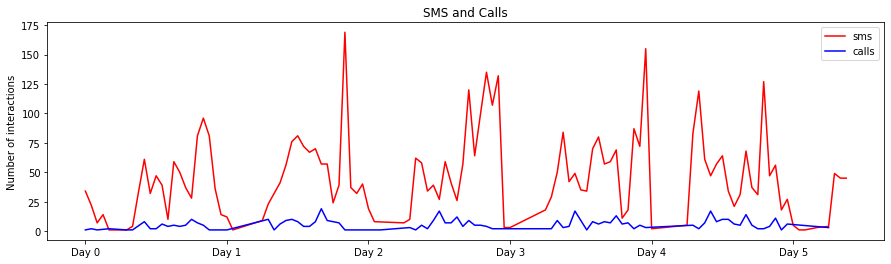

In [5]:
# make the dataset smaller
calls_small = calls[0:500]
sms_small = sms[0:5000]

def get_discretized_times(sms_small,calls_small):
    times_sms = []
    times_call = []

    for t,a,b in sms_small.to_numpy():
        times_sms.append(int(t/(60*60)))

    for t,a,b,d in calls_small.to_numpy():
        times_call.append(int(t/(60*60)))
    
    return times_sms, times_call
        
def my_plot(times_sms,times_call):
    t_s,count_s = np.unique(times_sms,return_counts=True)
    t_c,count_c = np.unique(times_call,return_counts=True)

    x_ticks = []
    x_labels = []
    for i in range(int((max(t_c)/24)+1)):
        x_ticks.append(i*24)
        x_labels.append("Day "+str(i))

    plt.figure(figsize=(15,4))
    plt.plot(t_s,count_s,label="sms",color="red")
    plt.plot(t_c,count_c,label="calls",color="blue")
    plt.ylabel("Number of interactions")
    plt.xticks(x_ticks, x_labels)
    plt.title("SMS and Calls")
    plt.legend()
    plt.savefig("nb_interactions.png")
    plt.show()


times_sms, times_call = get_discretized_times(sms_small,calls_small)
my_plot(times_sms,times_call)